**Load Data Titanic và setup**

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

##TỔNG QUAN

**Xem data**

In [ ]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


**Miêu tả các thông số cơ bản**

In [ ]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


**Đếm số records trong dataframe**

In [ ]:
dftrain.shape[0]

627

In [ ]:
dftrain.value_counts().sum()

627

**Thông tin chi tiết của các record**

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [ ]:
for column in dftrain.columns:
    num_distinct_values = dftrain[column].unique()
    print(f"{column}: {num_distinct_values}" )

survived: [0 1]
sex: ['male' 'female']
age: [22.   38.   26.   35.   28.    2.   27.   14.    4.   20.   39.   31.
 19.   40.   66.   42.    3.   18.    7.   49.   29.   65.   21.   28.5
 11.   45.   17.   32.   25.    0.83 30.   16.   23.   24.   46.   59.
 71.   34.   33.   37.   47.   14.5  70.5  32.5   9.   51.   55.5  40.5
 44.    1.   50.   36.   58.   20.5  41.   63.   43.   61.   15.   60.
 64.    5.   52.   48.   56.    0.75 54.   62.   53.   57.   80.    6.
 70.   30.5  10.   34.5 ]
n_siblings_spouses: [1 0 3 4 2 5 8]
parch: [0 1 2 5 3 4]
fare: [  7.25    71.2833   7.925   53.1      8.4583  21.075   11.1333  30.0708
  16.7      8.05    31.275    7.8542  29.125   13.      18.       7.225
  26.      35.5     31.3875 263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292  11.2417   9.475   21.
  41.5792  15.5     21.6792  17.8     39.6875  76.7292  61.9792  46.9
  80.      83.475   27.9     15.2458   8.1583   8.6625  73.5     56.4958
   7.65  

**Xử lý unknown values**

In [ ]:
for col in ['deck', 'embark_town']:
  unknown_count = (dftrain[col] == 'unknown').sum()
  print('Unknown in column {} is {}%'.format(col, np.round(unknown_count*100 / len(dftrain[col]) ) ))
  print('Number of unknown values:', unknown_count)


Unknown in column deck is 77.0%
Number of unknown values: 481
Unknown in column embark_town is 0.0%
Number of unknown values: 1


Nhận thấy 77% giá trị trong cột deck là unknown, vì vậy nhiều khả năng nó không mang lại giá trị hữu ích trong xây dựng model.

In [ ]:
# drop 'deck' column
data = dftrain.drop('deck', axis=1)

# process unknown values in 'embark_town'
data['embark_town'] = data['embark_town'].replace('unknown', data['embark_town'].value_counts().idxmax())

for col in ['embark_town']:
  unknown_count = (data[col] == 'unknown').sum()
  print('Number of unknown values:', unknown_count)


Number of unknown values: 0


Preparing data for correlation matrix

In [ ]:
# Prepare the data
alone_mapping = {
    'n': 0,
    'y': 1
}
data['alone'] = data['alone'].map(alone_mapping)

data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,male,28.0,0,0,8.4583,Third,Queenstown,1


In [ ]:
# Define the function for one-hot encoding copied from google:)
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df


for column in ['sex', 'class', 'embark_town']:
    data = perform_one_hot_encoding(data, column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 627 non-null    int64  
 1   age                      627 non-null    float64
 2   n_siblings_spouses       627 non-null    int64  
 3   parch                    627 non-null    int64  
 4   fare                     627 non-null    float64
 5   alone                    627 non-null    int64  
 6   sex_female               627 non-null    uint8  
 7   sex_male                 627 non-null    uint8  
 8   class_First              627 non-null    uint8  
 9   class_Second             627 non-null    uint8  
 10  class_Third              627 non-null    uint8  
 11  embark_town_Cherbourg    627 non-null    uint8  
 12  embark_town_Queenstown   627 non-null    uint8  
 13  embark_town_Southampton  627 non-null    uint8  
dtypes: float64(2), int64(4), u

In [ ]:
data.head()

,survived,age,n_siblings_spouses,parch,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,1,0,0,0,0,1
4,0,28.0,0,0,8.4583,1,0,1,0,0,1,0,1,0


##DATA VISUALIZATION

In [ ]:
dftrain.value_counts().sum()

627

**Biểu đồ số người trên tàu phân theo sống sót hoặc không**

<Axes: >

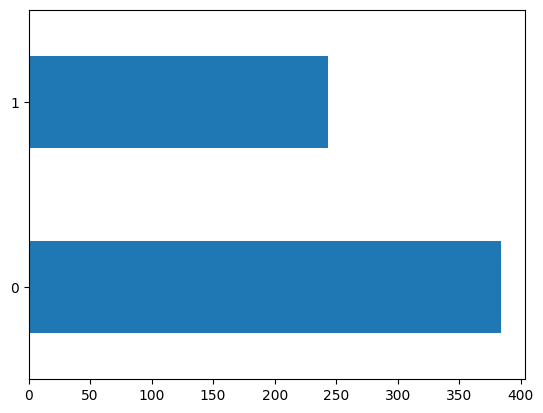

In [ ]:
dftrain.survived.value_counts().plot(kind='barh')

**Biểu đồ số người trên tàu phân theo giới tính**

<Axes: >

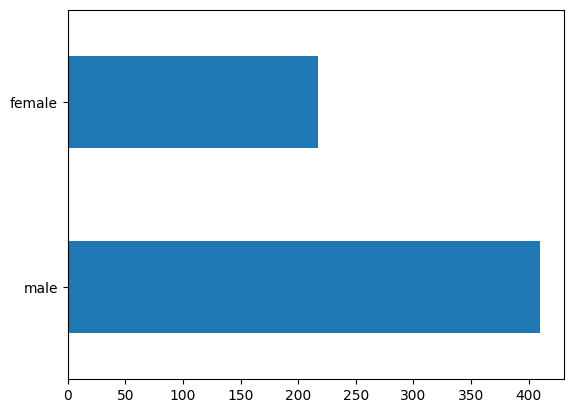

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

**Biểu đồ số người đi tàu phân theo hạng vé**

<Axes: >

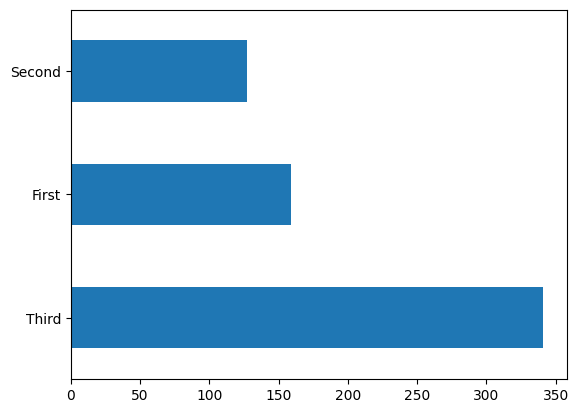

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

**Tổng hợp các dữ liệu qua biểu đồ**


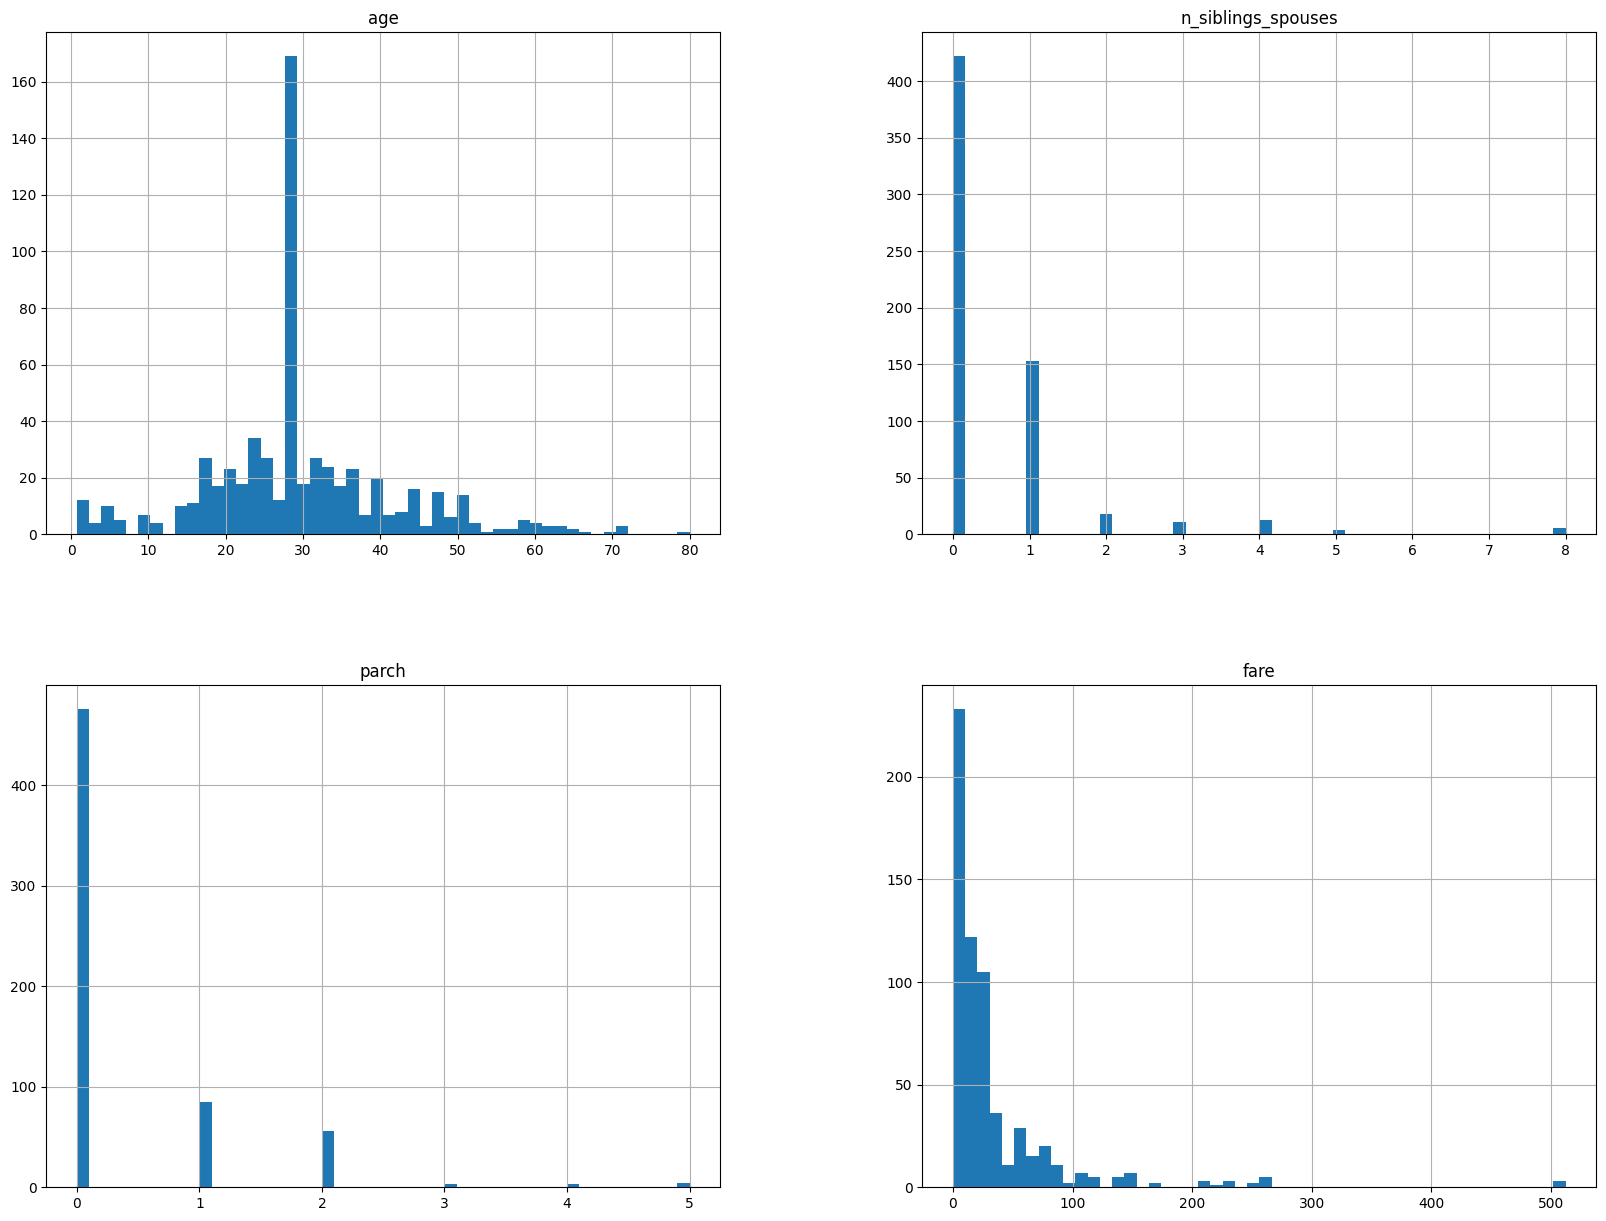

In [ ]:
# only in a Jupyter notebook
%matplotlib inline
dftrain1 = dftrain.drop('survived', axis=1, inplace=False)
import matplotlib.pyplot as plt
dftrain1.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
most_common_value = dftrain['age'].value_counts().idxmax()
most_common_value

28.0

**Box plots**

([<matplotlib.axis.XTick at 0x7a21b4df63e0>], [Text(1, 0, 'Age')])

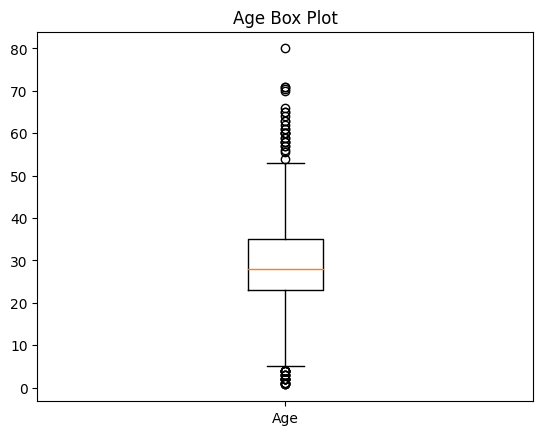

In [ ]:
plt.boxplot(dftrain['age'])
plt.title('Age Box Plot')
plt.xticks([1], ['Age'])


Biểu đồ trên cho thấy đa số hành khách nằm trong tầm từ 25-35 tuổi, trong đó giá trị trung bình là 28.

([<matplotlib.axis.XTick at 0x7a21b419a620>], [Text(1, 0, 'Fare')])

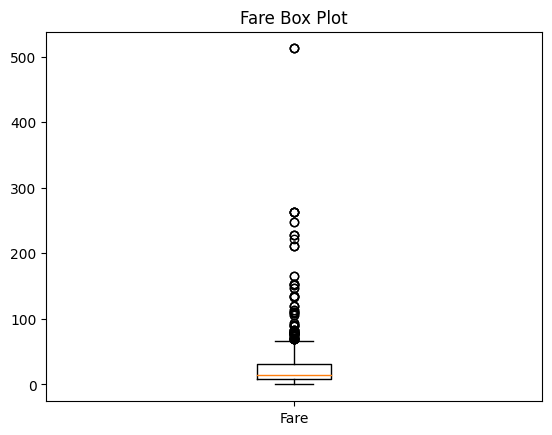

In [ ]:
plt.boxplot(dftrain['fare'])
plt.title('Fare Box Plot')
plt.xticks([1], ['Fare'])

*Outlier*

In [ ]:
max_value = dftrain['fare'].max()
max_value

512.3292

**Biểu đồ thể hiện độ liên quan của các chỉ số với sinh tồn**

Trực quan hóa với ma trận tương quan


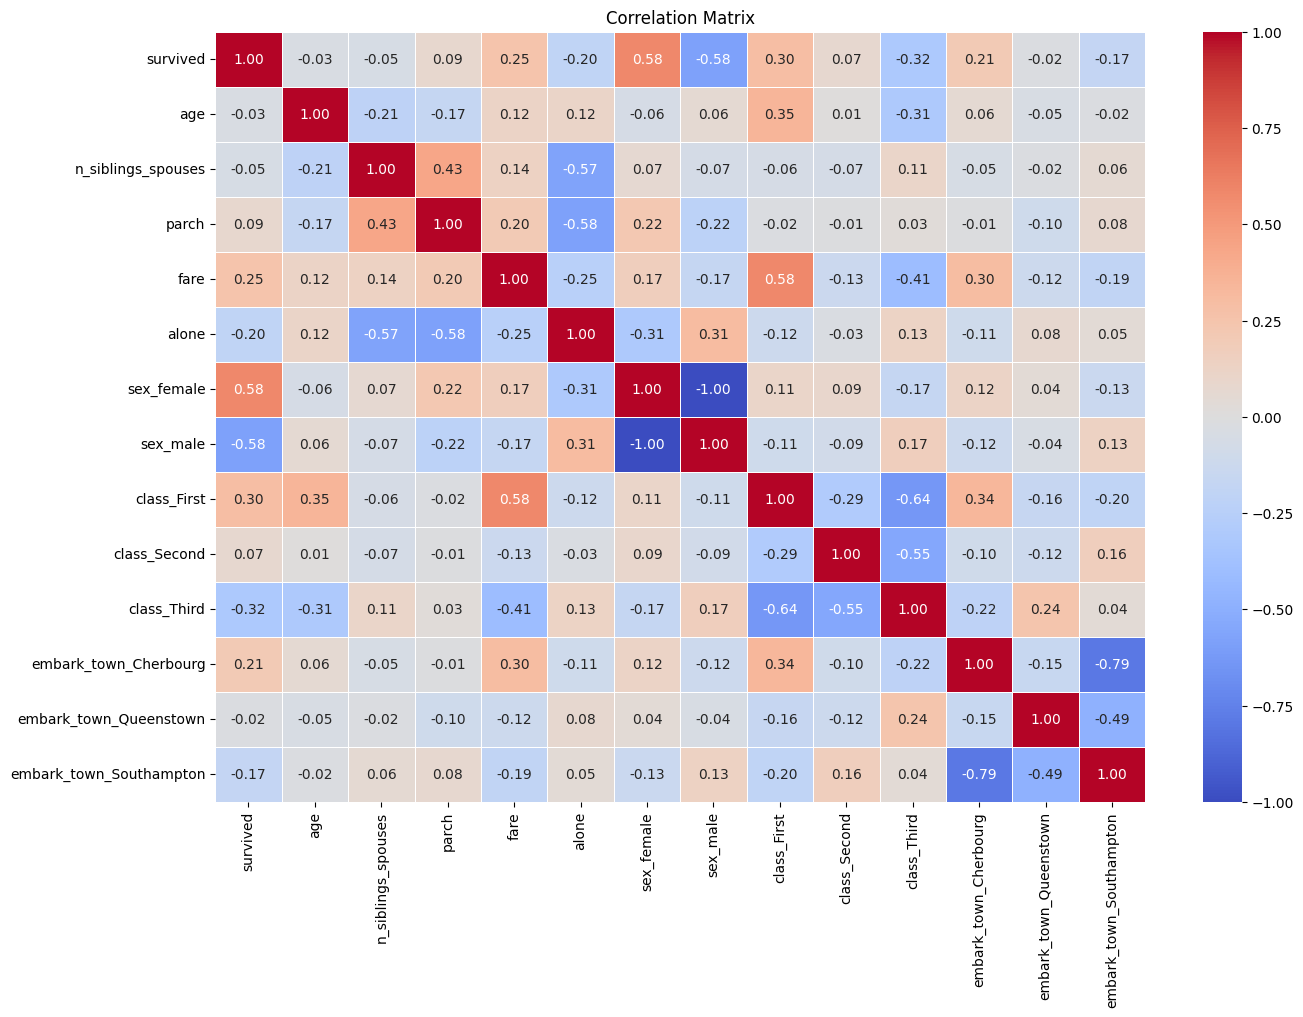

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
plt.title("Correlation Matrix")
plt.show()

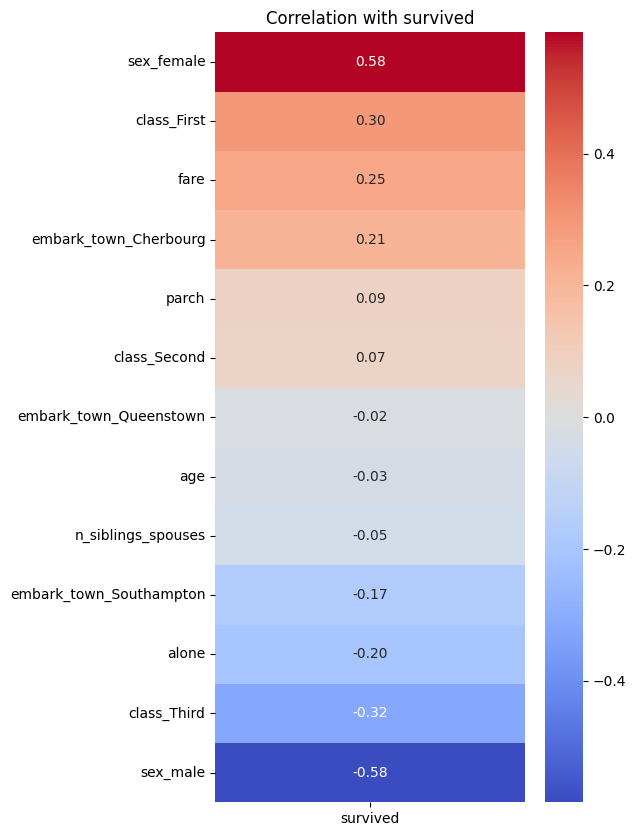

In [ ]:
for column in ['survived']:
    # heatmap
    corr = data.corr()
    target_corr = corr[column].drop(column)

    # Sort
    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {column}')
    plt.show()


**Theo như kết quả từ ma trận tương quan:**
- Tỉ lệ sống sót có sự tương thông (correlation) lớn với giới tính của hành khách. Các hành khách nữ có tỉ lệ sống sót cao, trong khi hành khách nam có tỉ lệ sống sót thấp. Điều này có thể lý giải rằng đàn ông có xu hướng sẽ nhường cho phụ nữ và trẻ em khi xảy ra tai nạn
- Hành khách thuộc Class cao thường có tỉ lệ sống sót lớn, với hành khách First Class là cao nhất, sau đó đến Second Class, Third Class. Tỉ lệ sống sót tỉ lệ thuận với phí đi tàu (fare) của hành khách. Điều này có thể là do đối với các hạng vé cao hơn có thể sẽ có lối đi ưu tiên và các thuyền cứu hộ ưu tiên
- Hành khách xuất phát từ cảng Cherbourg có nhiều khả năng sống sót hơn các hành khách khác. Những hành khách xuất phát ở cảng Cherbourg có xu hướng đi first class
- Hành khách đi một mình có khả năng sống sót thấp hơn. Dựa trên data có được  người đi một mình thường có xu hướng là nam.
- Các hành khách lớn tuổi hơn thì thường đi First Class
- Độ tuổi và đợt (parch) khách lên tàu không ảnh hưởng lớn đến khả năng sống sót của họ.
